# **1. Data Processing**

# 1.a Load the dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('diabetes.csv') #Load dataset

In [3]:
data.shape #Returns rows and columns of a dataset

(394, 9)

In [4]:
data.columns  #Returns column names to get an insight on the structure of the dataset

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.head(10) #Display the first few rows to understand the data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      180             78             63       14  59.4   
1            2       68             62             13       15  20.1   
2            2       88             58             26       16  28.4   
3            3       83             58             31       18  34.3   
4            1       99             72             30       18  38.6   
5            5      126             78             27       22  29.6   
6            5       88             66             21       23  24.4   
7            1        0             74             20       23  27.7   
8            1       89             24             19       25  27.8   
9           13      152             90             33       29  26.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     2.420   25        1  
1                     0.257   23        0  
2                     0.766   22        0  
3                     0.336   25        0  
4                     0.412   21        0  
5                     0.439   40        0  
6                     0.342   30        0  
7                     0.299   21        0  
8                     0.559   21        0  
9                     0.731   43        1

In [6]:
data.describe() #Gives statistical description of the dataset

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   394.000000  394.000000     394.000000     394.000000  394.000000   
mean      3.286802  122.304569      70.654822      29.106599  155.548223   
std       3.209635   31.396725      12.469919      10.504273  118.775855   
min       0.000000    0.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      62.000000      21.000000   76.250000   
50%       2.000000  119.000000      70.000000      29.000000  125.000000   
75%       5.000000  143.000000      78.000000      36.750000  190.000000   
max      17.000000  198.000000     110.000000      63.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  394.000000                394.000000  394.000000  394.000000  
mean    32.988579                  0.525543   30.814721    0.329949  
std      7.210160                  0.350127   10.198971    0.470792  
min      0.000000                  0.085000   21.000000    0.000000  
25%     28.325000                  0.270250   23.000000    0.000000  
50%     33.200000                  0.449500   27.000000    0.000000  
75%     37.075000                  0.687000   36.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
data.Outcome.value_counts()*100/len(data) #Calculation and Percentage distribution of the column Outcome of the dataset

Outcome
0    67.005076
1    32.994924
Name: count, dtype: float64

# 1.b Handling missing data values

In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

1.ai Impute missing values (replace with mean for numerical features)

In [9]:
data['Glucose'].replace(0, data['Glucose'].median(), inplace=True)


<ipython-input-9-edf5a016d151>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Glucose'].replace(0, data['Glucose'].median(), inplace=True)


In [10]:
data['BMI'].replace(0, data['BMI'].median(), inplace=True)

<ipython-input-10-ecf915e5d082>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BMI'].replace(0, data['BMI'].median(), inplace=True)


In [11]:
data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      180             78             63       14  59.4   
1            2       68             62             13       15  20.1   
2            2       88             58             26       16  28.4   
3            3       83             58             31       18  34.3   
4            1       99             72             30       18  38.6   
5            5      126             78             27       22  29.6   
6            5       88             66             21       23  24.4   
7            1      119             74             20       23  27.7   
8            1       89             24             19       25  27.8   
9           13      152             90             33       29  26.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     2.420   25        1  
1                     0.257   23        0  
2                     0.766   22        0  
3                     0.336   25        0  
4                     0.412   21        0  
5                     0.439   40        0  
6                     0.342   30        0  
7                     0.299   21        0  
8                     0.559   21        0  
9                     0.731   43        1

In [12]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# 1.c Correct data types

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               394 non-null    int64  
 1   Glucose                   394 non-null    int64  
 2   BloodPressure             394 non-null    int64  
 3   SkinThickness             394 non-null    int64  
 4   Insulin                   394 non-null    int64  
 5   BMI                       394 non-null    float64
 6   DiabetesPedigreeFunction  394 non-null    float64
 7   Age                       394 non-null    int64  
 8   Outcome                   394 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 27.8 KB


In [14]:
data['BMI'] = data['BMI'].astype(float)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               394 non-null    int64  
 1   Glucose                   394 non-null    int64  
 2   BloodPressure             394 non-null    int64  
 3   SkinThickness             394 non-null    int64  
 4   Insulin                   394 non-null    int64  
 5   BMI                       394 non-null    float64
 6   DiabetesPedigreeFunction  394 non-null    float64
 7   Age                       394 non-null    int64  
 8   Outcome                   394 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 27.8 KB


1.ci Detect duplicates

In [16]:
duplicates = data.duplicated()

In [17]:
# --- To see the actual duplicate rows:
duplicate_rows = data[data.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

1.cii Remove deplicates

In [18]:
# Identify and remove duplicate rows
data.drop_duplicates(inplace=True)

In [19]:
data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            0      180             78             63       14  59.4   
1            2       68             62             13       15  20.1   
2            2       88             58             26       16  28.4   
3            3       83             58             31       18  34.3   
4            1       99             72             30       18  38.6   
5            5      126             78             27       22  29.6   
6            5       88             66             21       23  24.4   
7            1      119             74             20       23  27.7   
8            1       89             24             19       25  27.8   
9           13      152             90             33       29  26.8   

   DiabetesPedigreeFunction  Age  Outcome  
0                     2.420   25        1  
1                     0.257   23        0  
2                     0.766   22        0  
3                     0.336   25        0  
4                     0.412   21        0  
5                     0.439   40        0  
6                     0.342   30        0  
7                     0.299   21        0  
8                     0.559   21        0  
9                     0.731   43        1

1.d Outlier detection

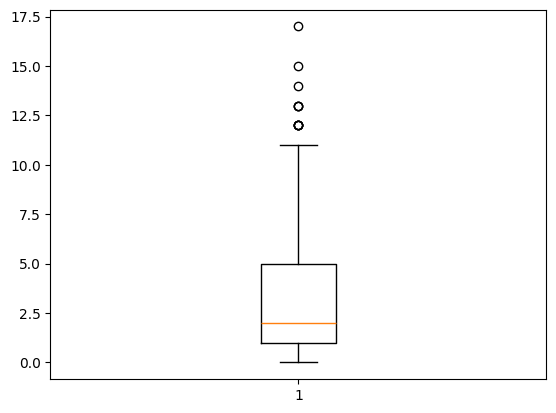

In [20]:
# 6.1 Using boxplots to visualize outliers (requires matplotlib)
import matplotlib.pyplot as plt
plt.boxplot(data['Pregnancies'])
plt.show()



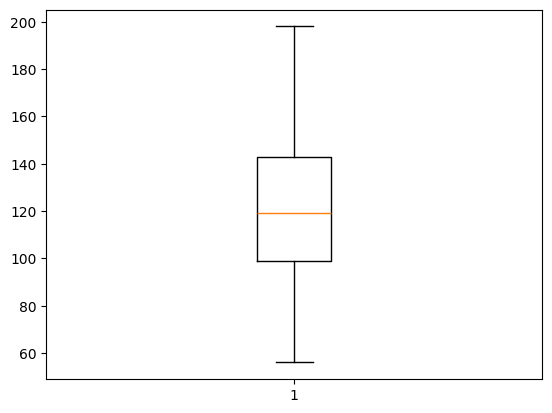

In [21]:
plt.boxplot(data['Glucose'])
plt.show()

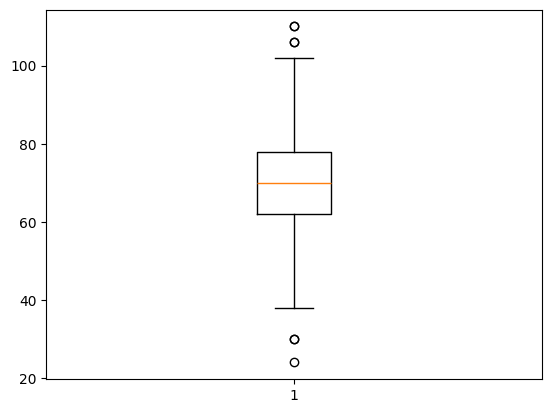

In [22]:
plt.boxplot(data['BloodPressure'])
plt.show()


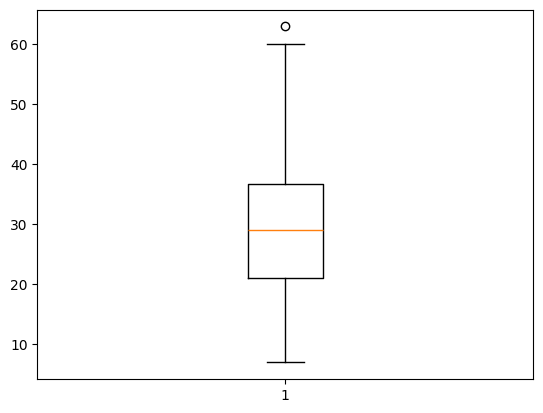

In [23]:
plt.boxplot(data['SkinThickness'])
plt.show()

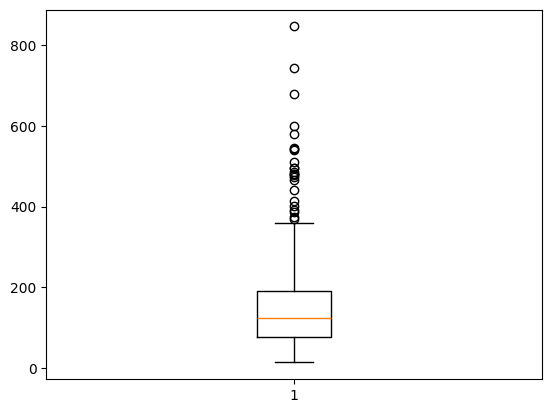

In [24]:
plt.boxplot(data['Insulin'])
plt.show()


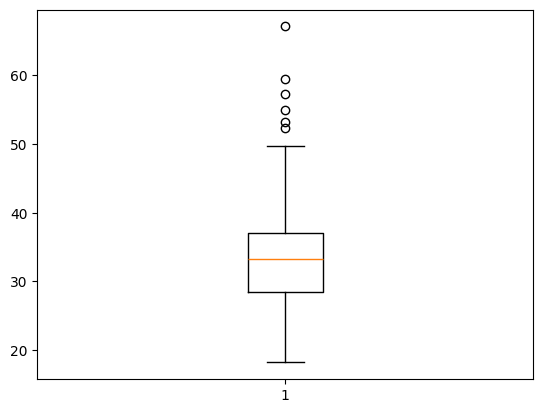

In [25]:
plt.boxplot(data['BMI'])
plt.show()

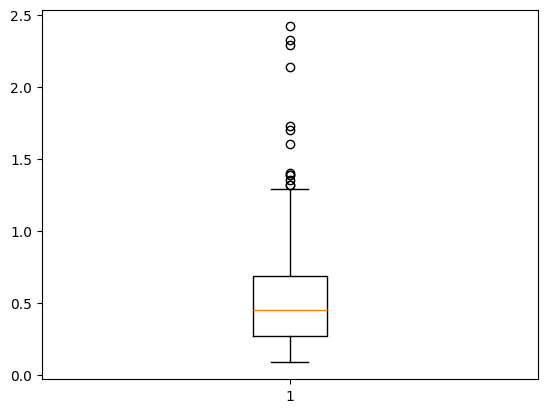

In [26]:
plt.boxplot(data['DiabetesPedigreeFunction'])
plt.show()


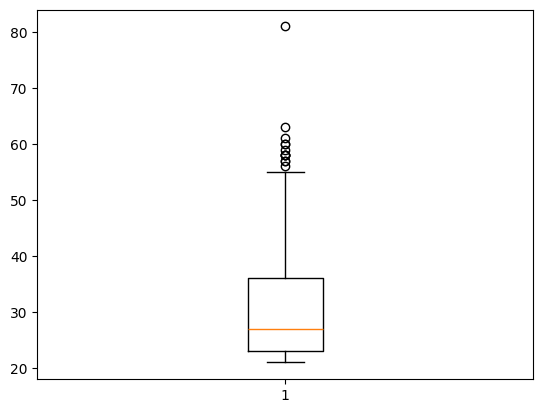

In [27]:
plt.boxplot(data['Age'])
plt.show()


1.di look at distribution of data points #look at histogram to see skewness

<Axes: xlabel='Pregnancies', ylabel='Count'>

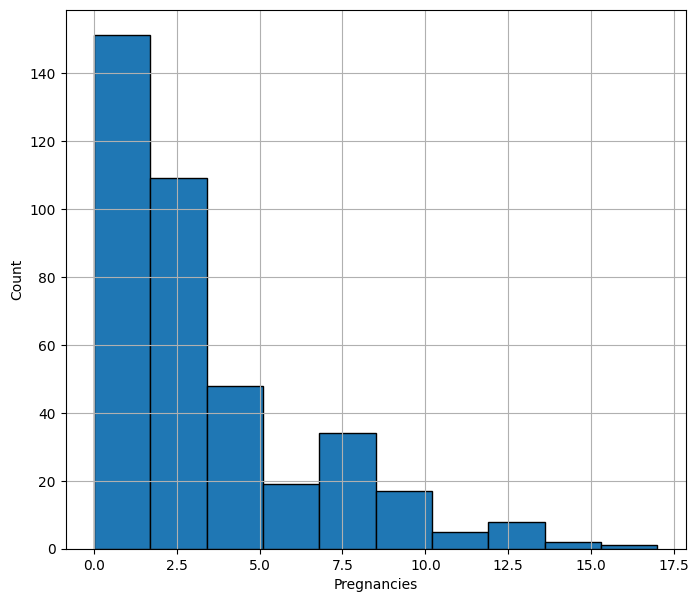

In [28]:
plt.figure(figsize=(8,7))
plt.xlabel('Pregnancies', fontsize=10)
plt.ylabel('Count', fontsize=10)
data['Pregnancies'].hist(edgecolor="black")

<Axes: xlabel='Glucose', ylabel='Count'>

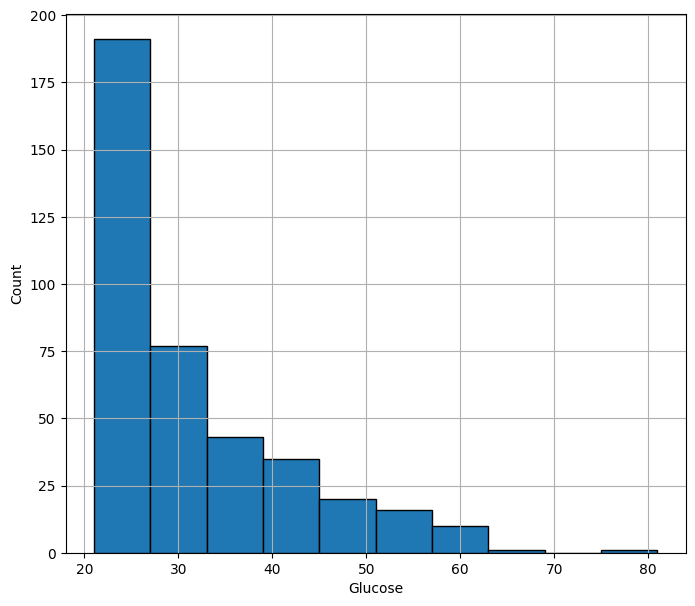

In [29]:
plt.figure(figsize=(8,7))
plt.xlabel('Glucose', fontsize=10)
plt.ylabel('Count', fontsize=10)
data['Age'].hist(edgecolor="black")

<Axes: xlabel='BloodPressure', ylabel='Count'>

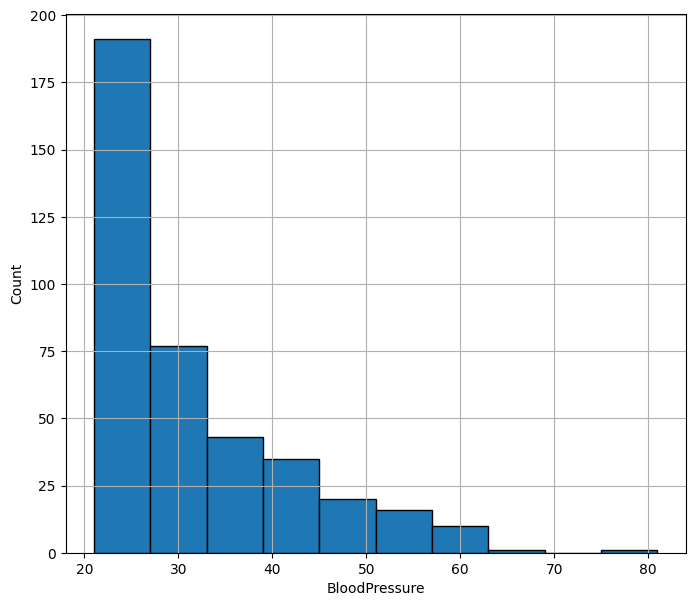

In [30]:
plt.figure(figsize=(8,7))
plt.xlabel('BloodPressure', fontsize=10)
plt.ylabel('Count', fontsize=10)
data['Age'].hist(edgecolor="black")

<Axes: xlabel='SkinThickness', ylabel='Count'>

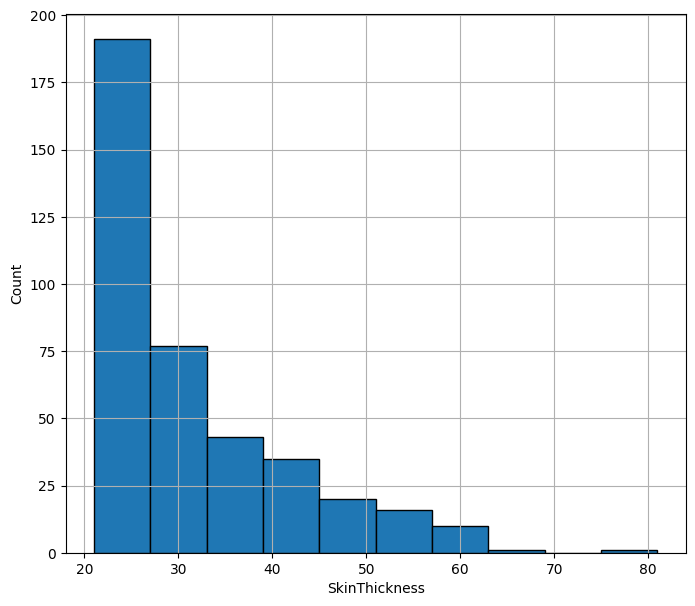

In [31]:
plt.figure(figsize=(8,7))
plt.xlabel('SkinThickness', fontsize=10)
plt.ylabel('Count', fontsize=10)
data['Age'].hist(edgecolor="black")

<Axes: xlabel='Insulin', ylabel='Count'>

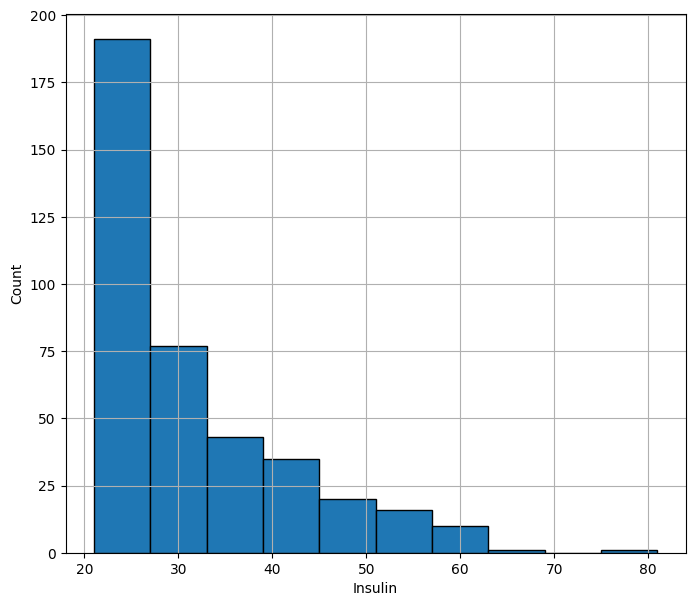

In [32]:
plt.figure(figsize=(8,7))
plt.xlabel('Insulin', fontsize=10)
plt.ylabel('Count', fontsize=10)
data['Age'].hist(edgecolor="black")

<Axes: xlabel='BMI', ylabel='Count'>

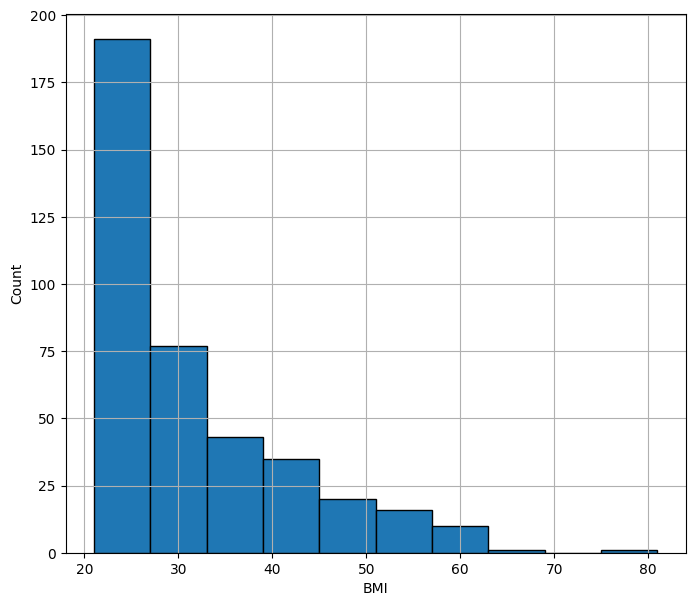

In [33]:
plt.figure(figsize=(8,7))
plt.xlabel('BMI', fontsize=10)
plt.ylabel('Count', fontsize=10)
data['Age'].hist(edgecolor="black")

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

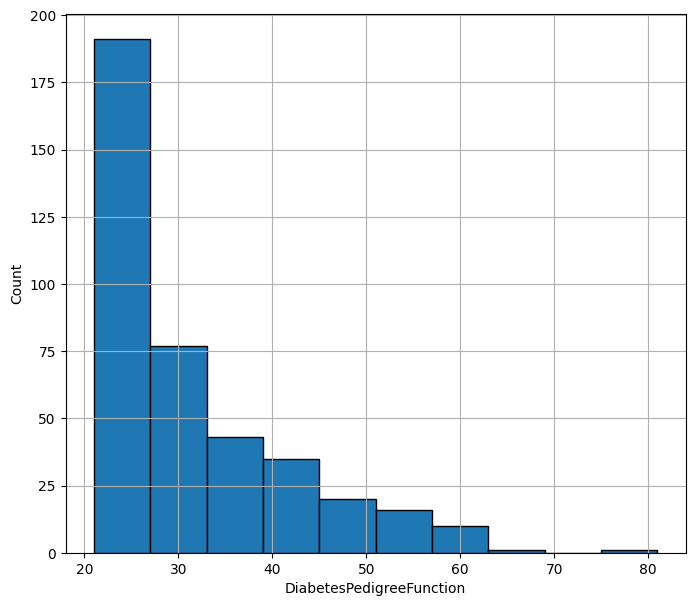

In [34]:
plt.figure(figsize=(8,7))
plt.xlabel('DiabetesPedigreeFunction', fontsize=10)
plt.ylabel('Count', fontsize=10)
data['Age'].hist(edgecolor="black")

<Axes: xlabel='Age', ylabel='Count'>

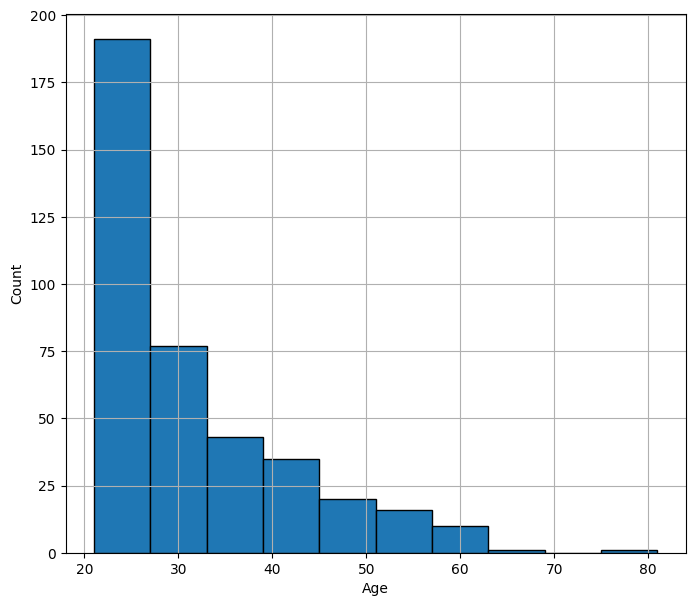

In [35]:
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
data['Age'].hist(edgecolor="black")

1.dii Remove outliers

In [36]:
#  Remove outliers (example: using IQR)
Q1 = data['Pregnancies'].quantile(0.25)
Q3 = data['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Pregnancies'] >= lower_bound) & (data['Pregnancies'] <= upper_bound)]

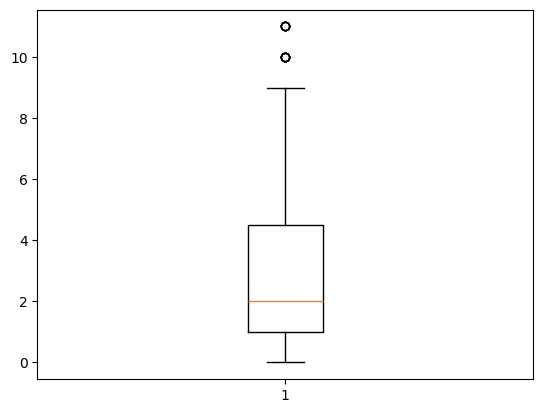

In [37]:
plt.boxplot(data['Pregnancies'])
plt.show()

In [38]:

Q1 = data['BloodPressure'].quantile(0.25)
Q3 = data['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['BloodPressure'] >= lower_bound) & (data['BloodPressure'] <= upper_bound)]

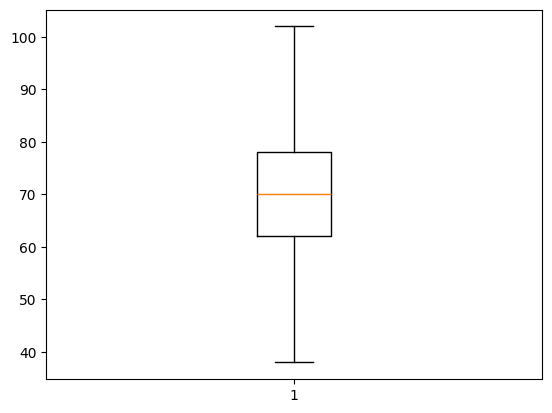

In [39]:
plt.boxplot(data['BloodPressure'])
plt.show()

In [40]:

Q1 = data['SkinThickness'].quantile(0.25)
Q3 = data['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['SkinThickness'] >= lower_bound) & (data['SkinThickness'] <= upper_bound)]

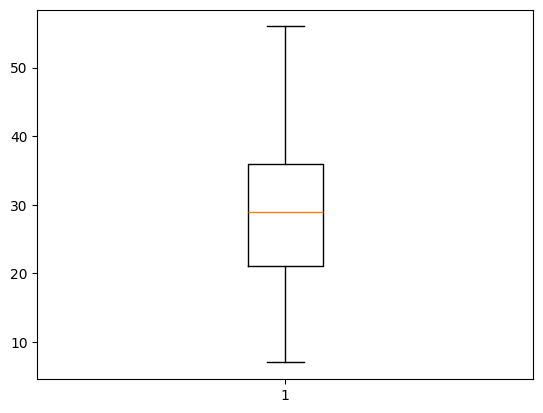

In [41]:
plt.boxplot(data['SkinThickness'])
plt.show()

In [42]:
Q1 = data['Insulin'].quantile(0.25)
Q3 = data['Insulin'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Insulin'] >= lower_bound) & (data['Insulin'] <= upper_bound)]

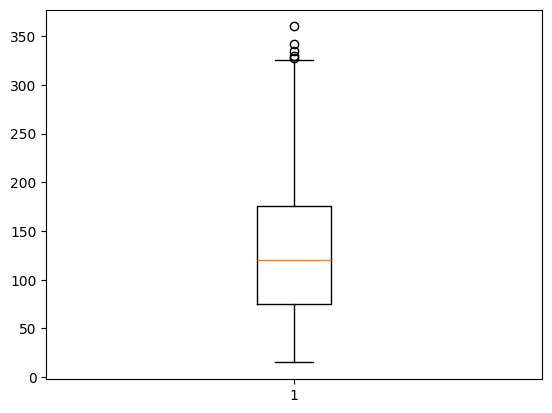

In [43]:
plt.boxplot(data['Insulin'])
plt.show()

In [44]:
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['BMI'] >= lower_bound) & (data['BMI'] <= upper_bound)]

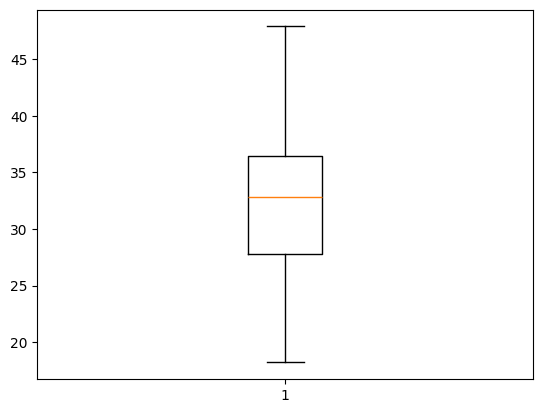

In [45]:
plt.boxplot(data['BMI'])
plt.show()

In [46]:
Q1 = data['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = data['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['DiabetesPedigreeFunction'] >= lower_bound) & (data['DiabetesPedigreeFunction'] <= upper_bound)]

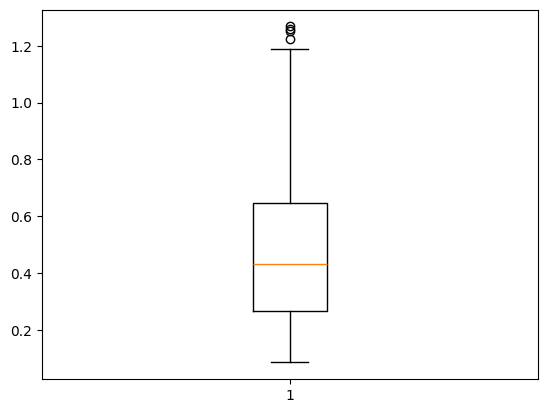

In [47]:
plt.boxplot(data['DiabetesPedigreeFunction'])
plt.show()

In [48]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

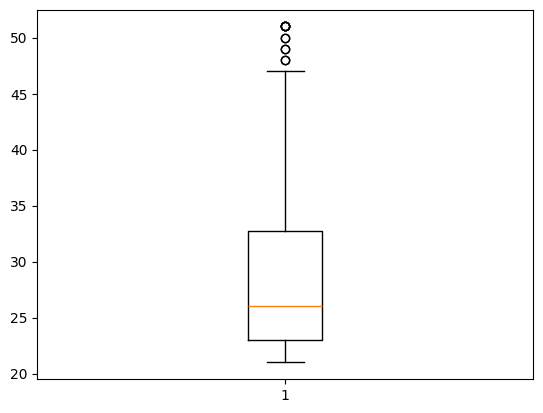

In [49]:
plt.boxplot(data['Age'])
plt.show()

# 1.e Data transformation

In [50]:
# 7.1 Scaling numerical features (using MinMaxScaler from scikit-learn)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Pregnancies'] = scaler.fit_transform(data[['Pregnancies']])

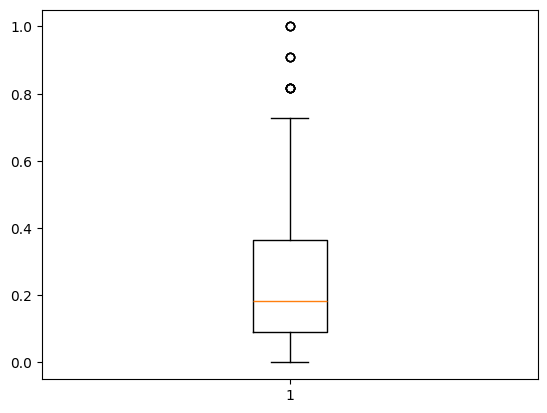

In [52]:
plt.boxplot(data['Pregnancies'])
plt.show()

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Glucose'] = scaler.fit_transform(data[['Glucose']])

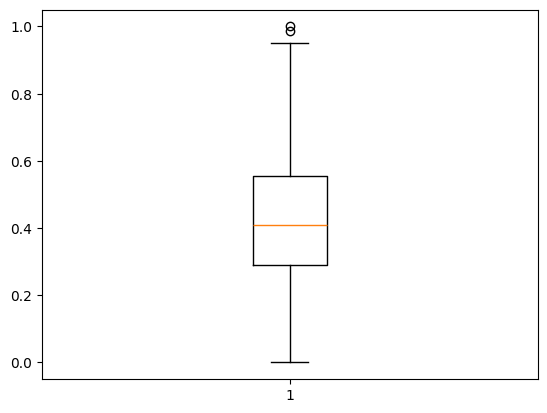

In [54]:
plt.boxplot(data['Glucose'])
plt.show()

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['BloodPressure'] = scaler.fit_transform(data[['BloodPressure']])

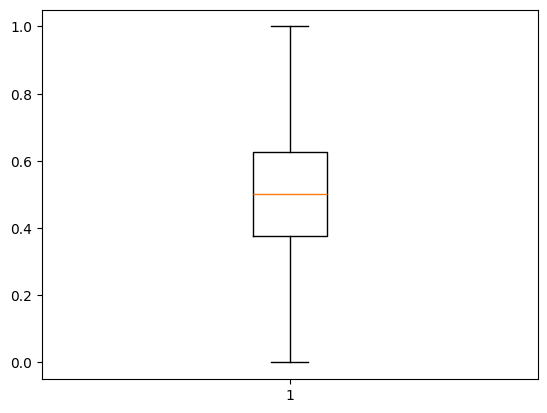

In [56]:
plt.boxplot(data['BloodPressure'])
plt.show()

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['SkinThickness'] = scaler.fit_transform(data[['SkinThickness']])

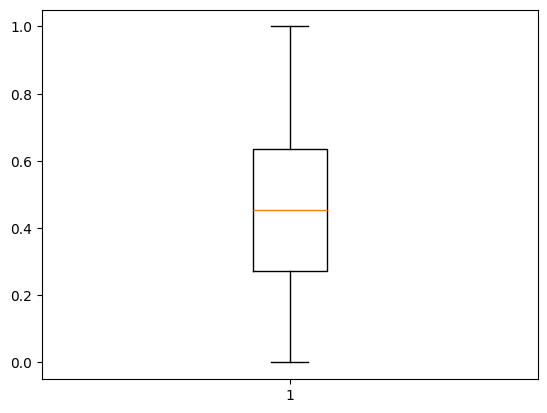

In [58]:
plt.boxplot(data['SkinThickness'])
plt.show()

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Insulin'] = scaler.fit_transform(data[['Insulin']])

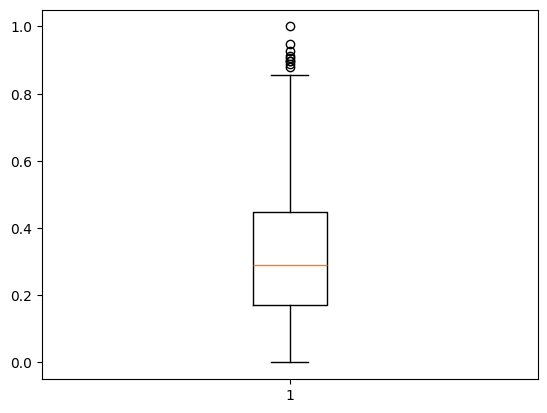

In [60]:
plt.boxplot(data['Insulin'])
plt.show()

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['BMI'] = scaler.fit_transform(data[['BMI']])

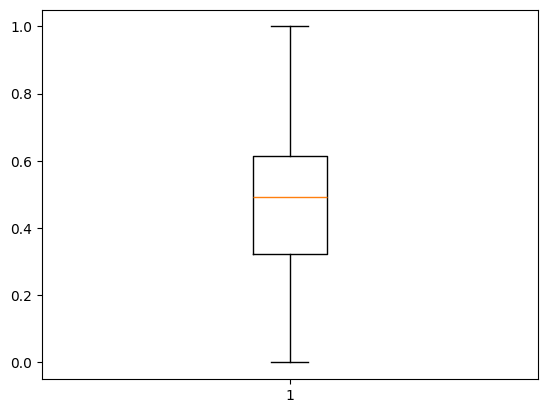

In [62]:
plt.boxplot(data['BMI'])
plt.show()

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['DiabetesPedigreeFunction'] = scaler.fit_transform(data[['DiabetesPedigreeFunction']])

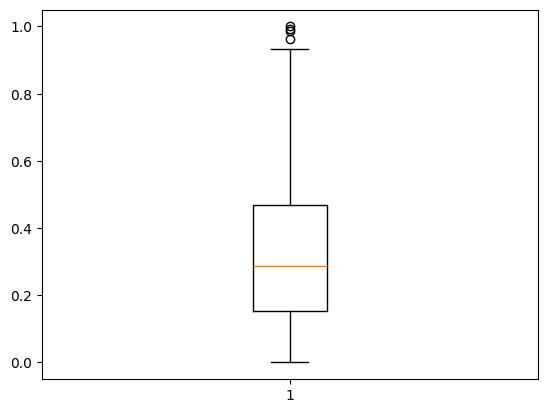

In [64]:
plt.boxplot(data['DiabetesPedigreeFunction'])
plt.show()

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])

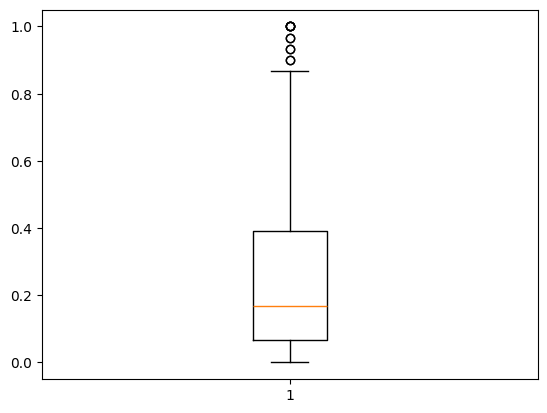

In [66]:
plt.boxplot(data['Age'])
plt.show()

1.f Save the cleaned dataset

In [67]:
data.to_csv('cleaned_dataset.csv', index=False)

# **2. EDA on Cleaned Diabetes Database ***

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2.a Load dataset

In [69]:
data = pd.read_csv('cleaned_dataset.csv') #Load dataset

# 2.b Create charts

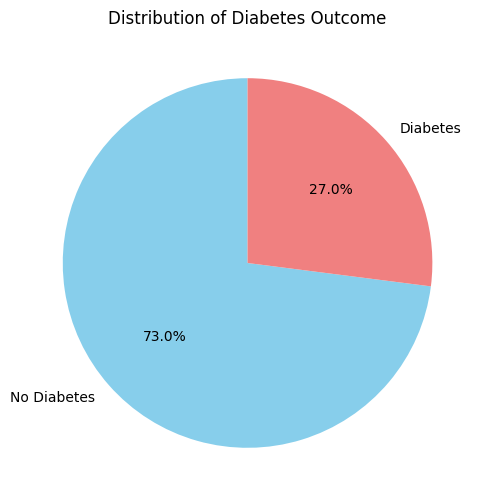

In [70]:

# Create a pie chart for the distribution of the Outcome column
outcome_counts = data['Outcome'].value_counts()
outcome_labels = ['No Diabetes', 'Diabetes']

# Plot the pie chart for Outcome
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=outcome_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Diabetes Outcome')
plt.show()

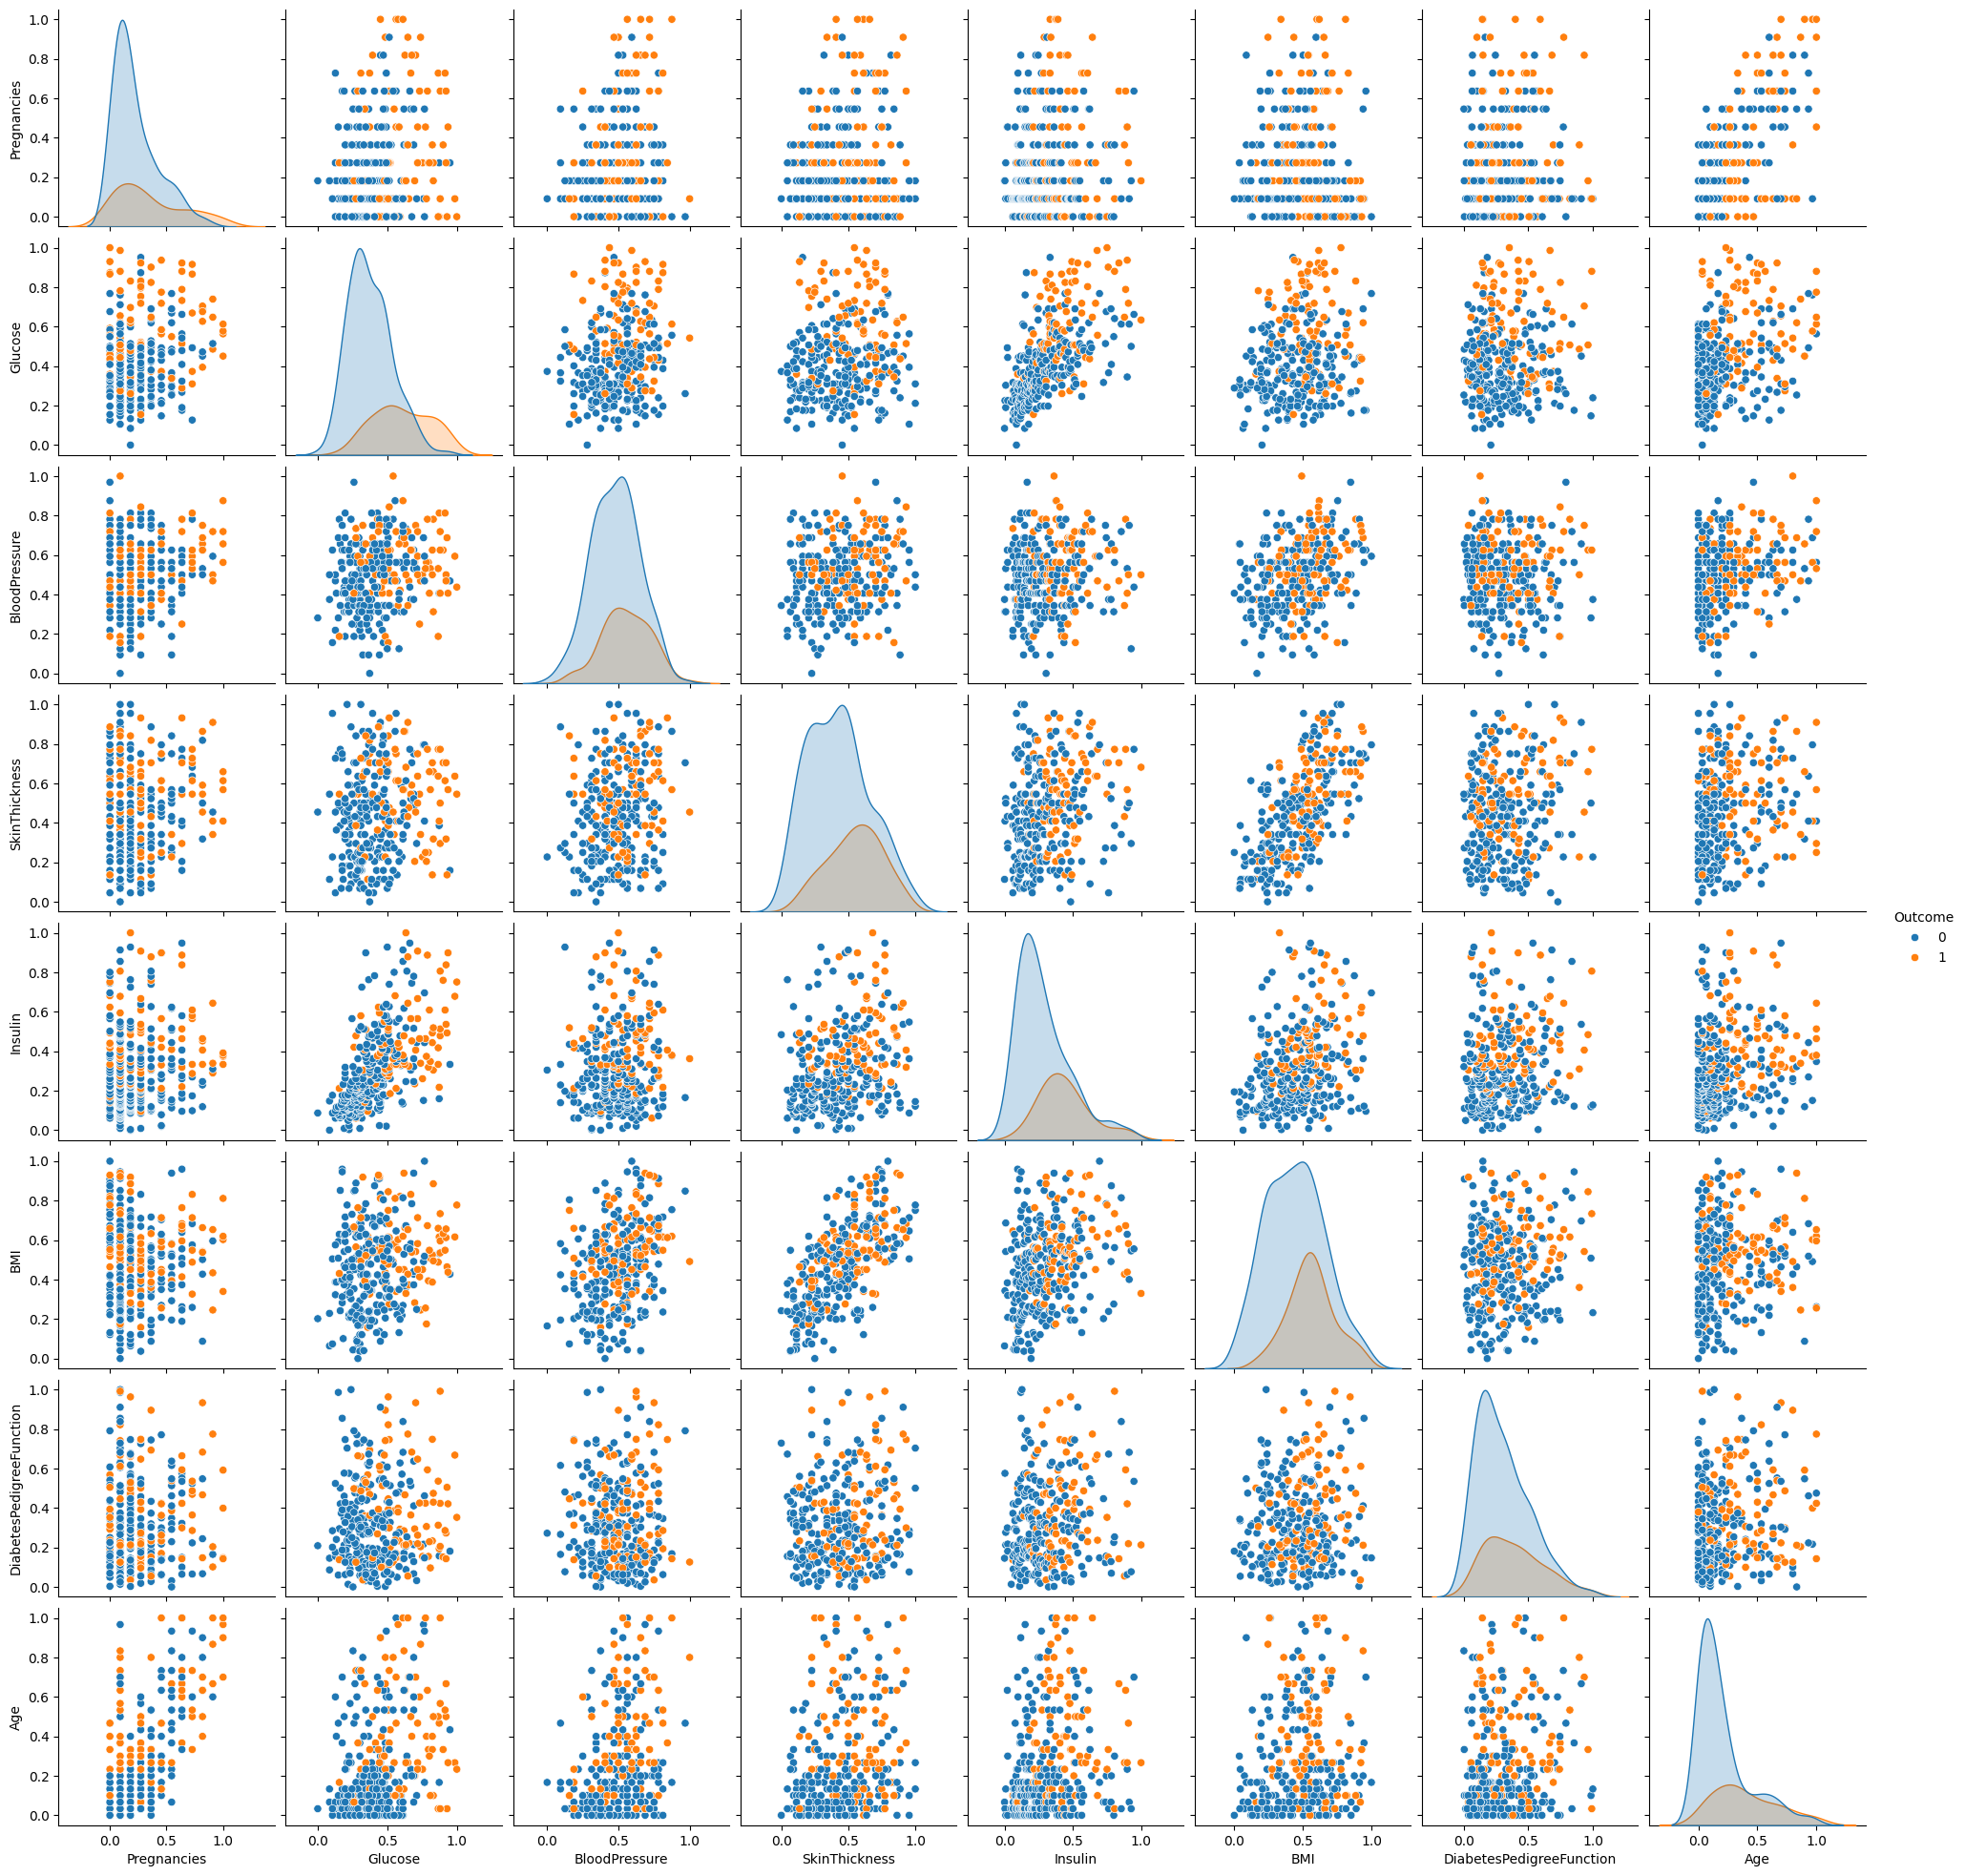

In [71]:
sns.pairplot(data,vars=['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'], hue = 'Outcome')
plt.show()

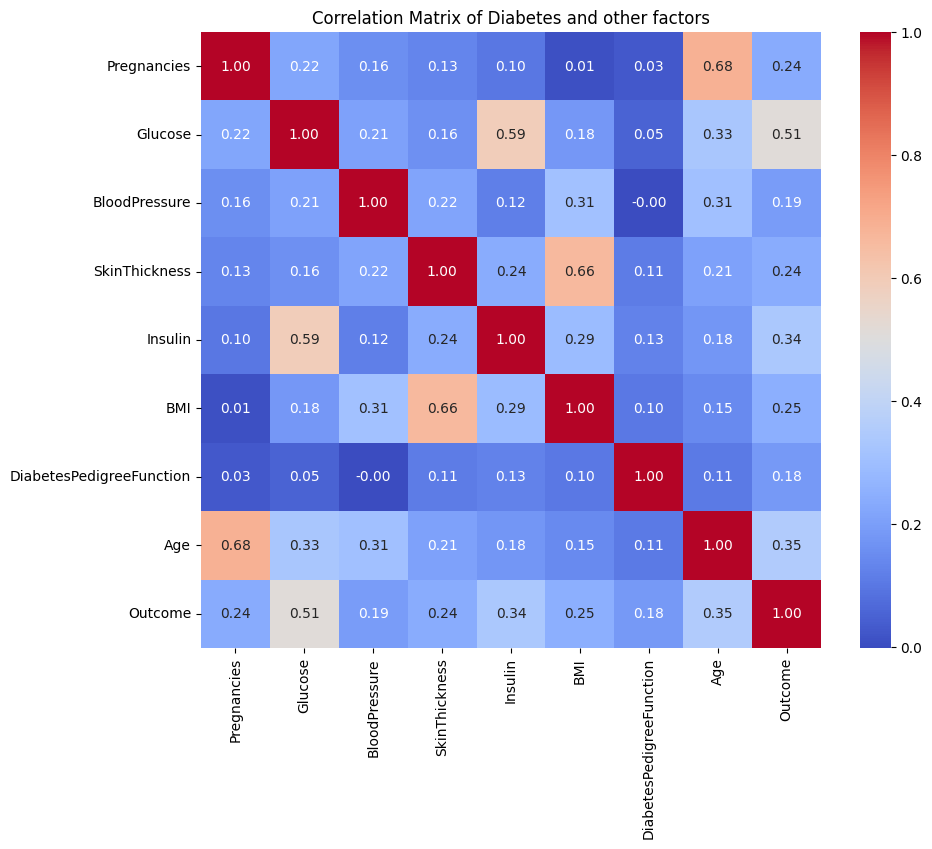

In [72]:
correlations = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Diabetes and other factors')
plt.show()

# **3. Logistic Regression**

# 3.a Prepare data

In [79]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, auc
data = pd.read_csv('cleaned_dataset.csv')


In [80]:
# Convert quality to binary (good/bad) - consider good if quality >= 1
data['Outcome_binary'] = (data['Outcome'] >= 1).astype(int)

# Select features and target variable
X = data[['SkinThickness', 'BMI']]  # set two features
y = data['Outcome_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
X_train.shape, y_train.shape

((257, 2), (257,))

# 3.b Train the logistic Regression model

In [82]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [83]:
# Get the weights
weights = model.coef_

print(weights)

[[1.24918249 1.24765549]]


In [84]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Make predictions on the train set
y_pred_train = model.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.7198443579766537
Test Accuracy: 0.7538461538461538


In [85]:
X_test.iloc[[10]]

SkinThickness      BMI
196       0.295455  0.23569

3.bi Predict the class label for the new sample

In [86]:
prediction = model.predict(X_test.iloc[[10]])

print(prediction)

[0]


In [87]:
# Get the probabilities for the first row of X_test
probabilities = model.predict_proba(X_test.iloc[[10]])

print(probabilities)

[[0.81301664 0.18698336]]


# 3.c Predict probabilities and evaluate at different thresholds

In [88]:
thresholds = [0.3, 0.5, 0.7]  # Example thresholds

for threshold in thresholds:
    # Get predicted probabilities
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

    # Apply threshold to get binary predictions
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print results
    print(f"--- Threshold: {threshold} ---")
    print("True Positives:", tp)
    print("False Positives:", fp)
    print("True Negatives:", tn)
    print("False Negatives:", fn)
    print("Accuracy:", accuracy)
    print("-------------------------\n")

--- Threshold: 0.3 ---
True Positives: 11
False Positives: 21
True Negatives: 29
False Negatives: 4
Accuracy: 0.6153846153846154
-------------------------

--- Threshold: 0.5 ---
True Positives: 1
False Positives: 2
True Negatives: 48
False Negatives: 14
Accuracy: 0.7538461538461538
-------------------------

--- Threshold: 0.7 ---
True Positives: 0
False Positives: 0
True Negatives: 50
False Negatives: 15
Accuracy: 0.7692307692307693
-------------------------



# 3.d Calculate FPR, TPR, and thresholds using rec_curve

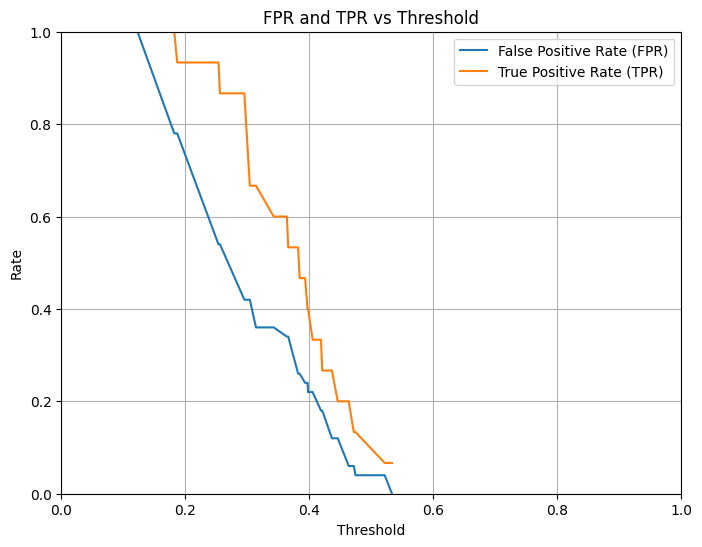

In [89]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# --- Plot FPR and TPR vs threshold ---

plt.figure(figsize=(8, 6))
plt.plot(thresholds, fpr, label='False Positive Rate (FPR)')
plt.plot(thresholds, tpr, label='True Positive Rate (TPR)')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('FPR and TPR vs Threshold')
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# 3.e Calculate AUC (Area Under Curve)

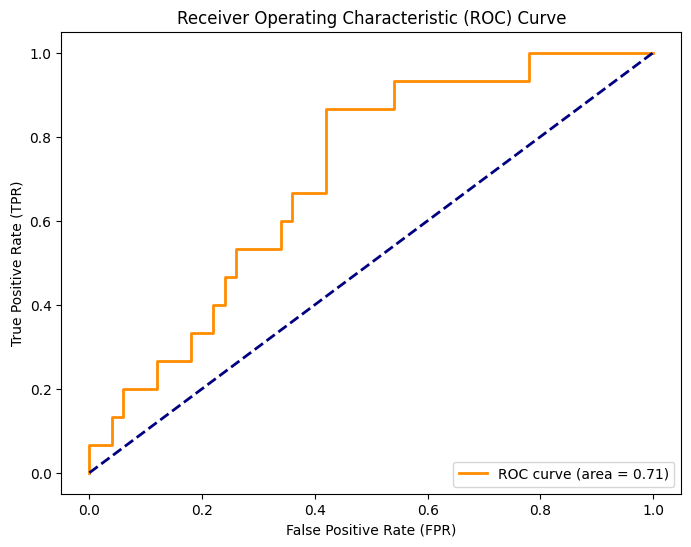

In [90]:
roc_auc = auc(fpr, tpr)
# --- Plot ROC curve (FPR vs TPR) ---

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

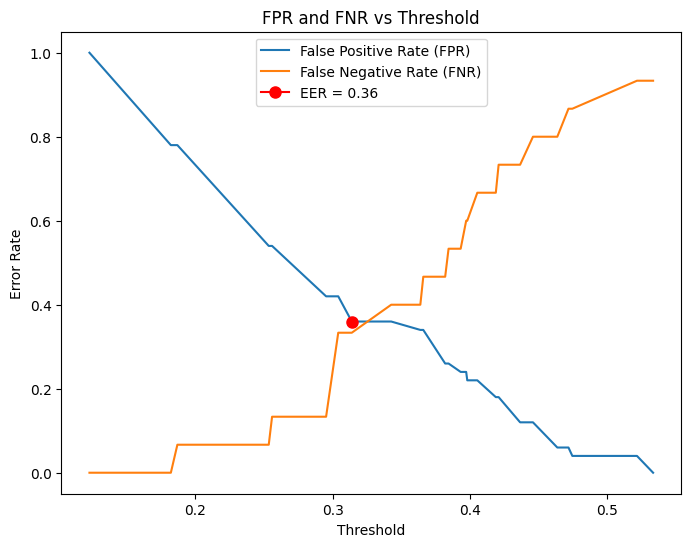

In [91]:
# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# --- Calculate FNR ---
fnr = 1 - tpr

# --- Find the EER (Equal Error Rate) ---
eer_threshold = thresholds[np.argmin(np.abs(fpr - fnr))]
eer = fpr[np.argmin(np.abs(fpr - fnr))]

# --- Plot FPR and FNR vs threshold ---

plt.figure(figsize=(8, 6))
plt.plot(thresholds, fpr, label='False Positive Rate (FPR)')
plt.plot(thresholds, fnr, label='False Negative Rate (FNR)')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('FPR and FNR vs Threshold')

# Mark the EER point
plt.plot(eer_threshold, eer, marker='o', markersize=8, color="red", label=f'EER = {eer:.2f}')

plt.legend()
plt.show()

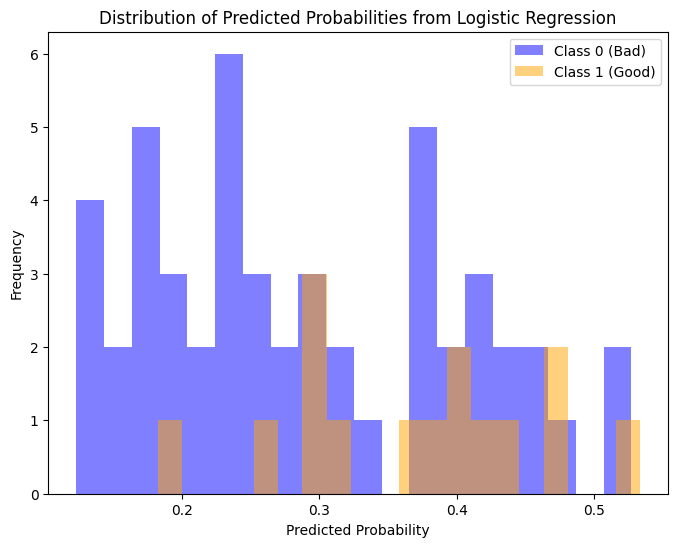

In [92]:
# --- Plot the distribution of predicted probabilities ---

plt.figure(figsize=(8, 6))

# Plot for class 0 (bad quality)
plt.hist(y_pred_prob[y_test == 0], bins=20, color='blue', alpha=0.5, label='Class 0 (Bad)')

# Plot for class 1 (good quality)
plt.hist(y_pred_prob[y_test == 1], bins=20, color='orange', alpha=0.5, label='Class 1 (Good)')

plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities from Logistic Regression')
plt.legend()
plt.show()

# 3.f Polynomial Feature

In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Assuming you have X_train and y_train

# Create polynomial features
poly = PolynomialFeatures(degree=10)  # Adjust the degree as needed

# Create a pipeline to combine polynomial features and logistic regression
model = Pipeline([
    ('poly', poly),
    ('logistic', LogisticRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [94]:
thresholds = [0.3, 0.5, 0.7]  # Example thresholds

for threshold in thresholds:
    # Get predicted probabilities
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

    # Apply threshold to get binary predictions
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print results
    print(f"--- Threshold: {threshold} ---")
    print("True Positives:", tp)
    print("False Positives:", fp)
    print("True Negatives:", tn)
    print("False Negatives:", fn)
    print("Accuracy:", accuracy)
    print("-------------------------\n")

--- Threshold: 0.3 ---
True Positives: 12
False Positives: 21
True Negatives: 29
False Negatives: 3
Accuracy: 0.6307692307692307
-------------------------

--- Threshold: 0.5 ---
True Positives: 0
False Positives: 0
True Negatives: 50
False Negatives: 15
Accuracy: 0.7692307692307693
-------------------------

--- Threshold: 0.7 ---
True Positives: 0
False Positives: 0
True Negatives: 50
False Negatives: 15
Accuracy: 0.7692307692307693
-------------------------



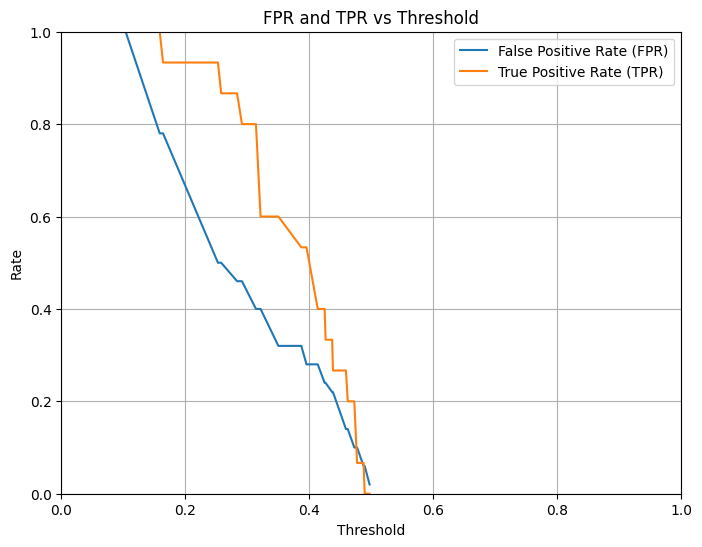

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# --- Plot FPR and TPR vs threshold ---

plt.figure(figsize=(8, 6))
plt.plot(thresholds, fpr, label='False Positive Rate (FPR)')
plt.plot(thresholds, tpr, label='True Positive Rate (TPR)')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('FPR and TPR vs Threshold')
plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


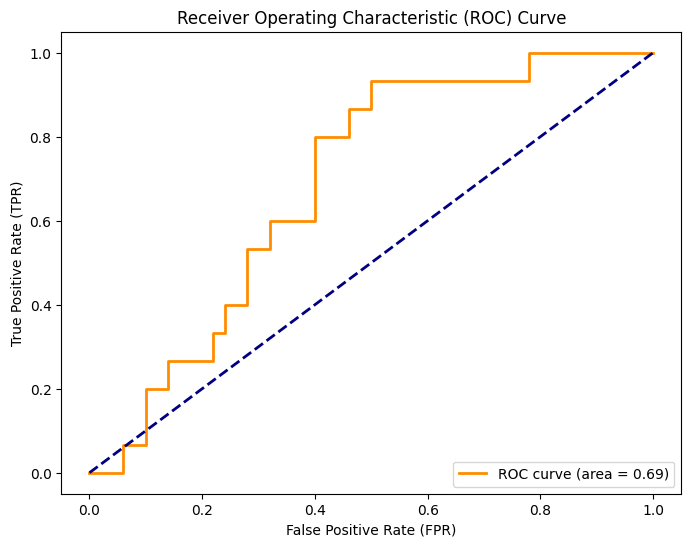

In [96]:
roc_auc = auc(fpr, tpr)
# --- Plot ROC curve (FPR vs TPR) ---

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

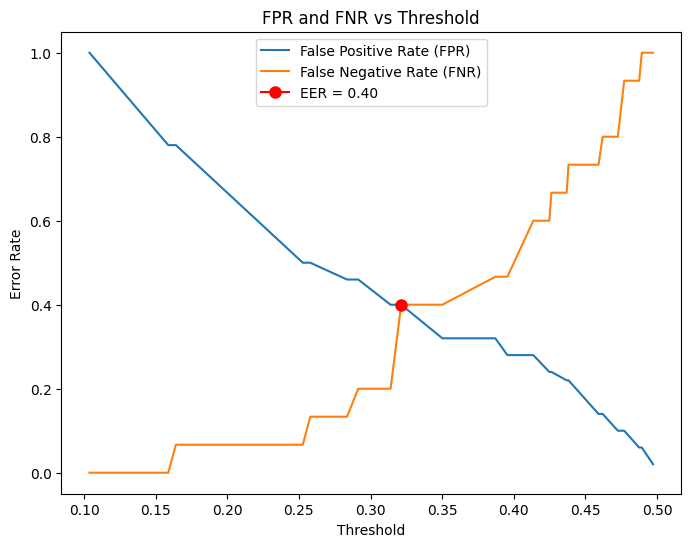

In [97]:
# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# --- Calculate FNR ---
fnr = 1 - tpr

# --- Find the EER (Equal Error Rate) ---
eer_threshold = thresholds[np.argmin(np.abs(fpr - fnr))]
eer = fpr[np.argmin(np.abs(fpr - fnr))]

# --- Plot FPR and FNR vs threshold ---

plt.figure(figsize=(8, 6))
plt.plot(thresholds, fpr, label='False Positive Rate (FPR)')
plt.plot(thresholds, fnr, label='False Negative Rate (FNR)')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('FPR and FNR vs Threshold')

# Mark the EER point
plt.plot(eer_threshold, eer, marker='o', markersize=8, color="red", label=f'EER = {eer:.2f}')

plt.legend()
plt.show()

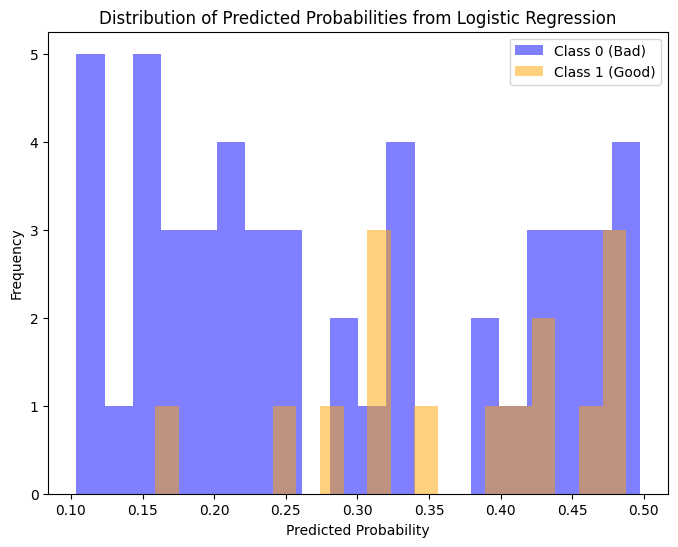

In [98]:
# --- Plot the distribution of predicted probabilities ---

plt.figure(figsize=(8, 6))

# Plot for class 0 (bad quality)
plt.hist(y_pred_prob[y_test == 0], bins=20, color='blue', alpha=0.5, label='Class 0 (Bad)')

# Plot for class 1 (good quality)
plt.hist(y_pred_prob[y_test == 1], bins=20, color='orange', alpha=0.5, label='Class 1 (Good)')

plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities from Logistic Regression')
plt.legend()
plt.show()

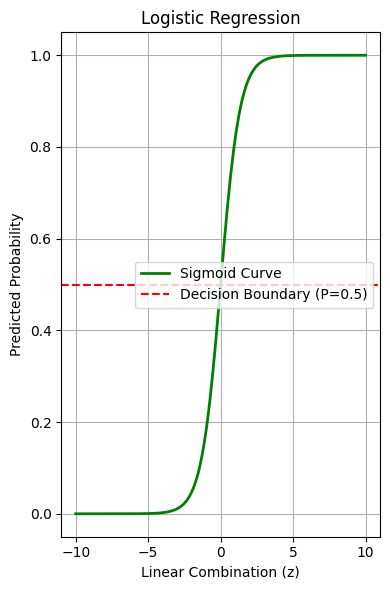

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Generate input data
x = np.linspace(-10, 10, 200)
z = 1.5 * x  # Linear combination (z = beta_0 + beta_1*x)

# Logistic (sigmoid) function
sigmoid = 1 / (1 + np.exp(-z))

# Plot sigmoid function
plt.figure(figsize=(4, 6))
plt.plot(x, sigmoid, color="green", linewidth=2, label="Sigmoid Curve")
plt.axhline(0.5, color="red", linestyle="--", label="Decision Boundary (P=0.5)")
plt.title("Logistic Regression")
plt.xlabel("Linear Combination (z)")
plt.ylabel("Predicted Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("logistic_regression.png")
plt.show()

# **4. Random Forest**

# 4.a load and prepare data

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [101]:
# Load the dataset
diabetes_data = pd.read_csv('cleaned_dataset.csv')

# Convert Outcome to binary (good/bad) - consider good if quality >= 1
diabetes_data['Outcome_binary'] = (diabetes_data['Outcome'] >= 1).astype(int)

# Select features and target variable
X = diabetes_data[['SkinThickness', 'BMI']]  # Example features
y = diabetes_data['Outcome']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4.b Create a decision tree classifier

In [102]:
dt_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Make predictions on the train set
y_pred_train = dt_classifier.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.9922178988326849
Test Accuracy: 0.6153846153846154


# 4.c Plot the decision tree

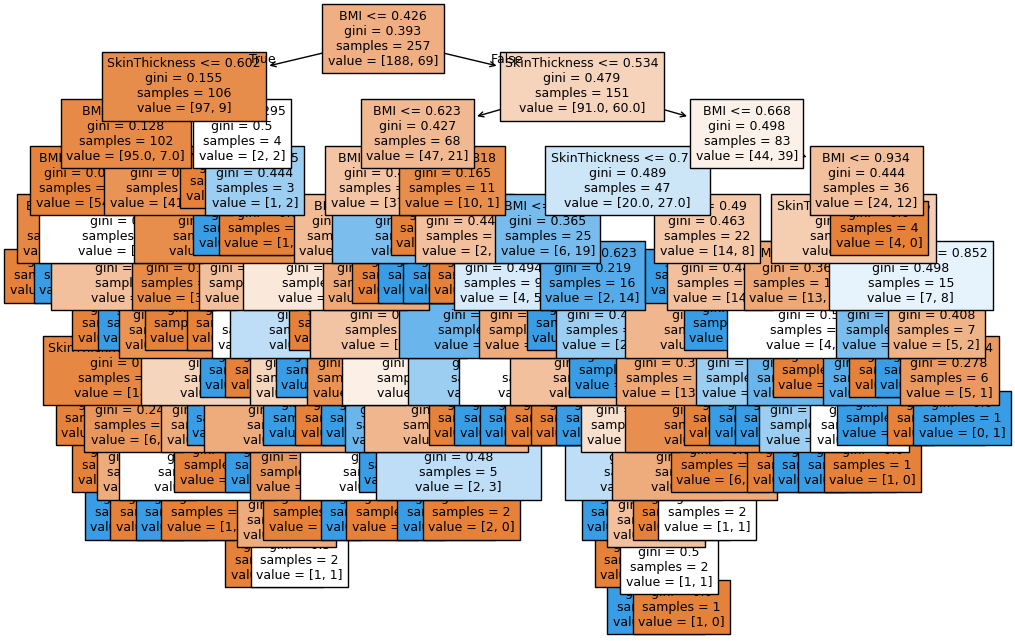

In [105]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))  # Adjust figure size if needed
plot_tree(dt_classifier,
          filled=True,
          fontsize=9,
          feature_names=X.columns)  # Use X.columns to get all feature names
plt.show()

In [106]:
# Get the number of leaf nodes
n_leaves = dt_classifier.get_n_leaves()
print(f"Number of leaf nodes: {n_leaves}")

# Get the depth of the tree
depth = dt_classifier.get_depth()
print(f"Depth of the tree: {depth}")

# Get the total number of nodes
n_nodes = dt_classifier.tree_.node_count
print(f"Total number of nodes: {n_nodes}")

Number of leaf nodes: 77
Depth of the tree: 12
Total number of nodes: 153


# 4.d mitigate overfitting

4.di Pre-pruning

In [107]:
dt_classifier = DecisionTreeClassifier(random_state=42,
                                    max_depth=5,
                                    min_samples_split=10,
                                    min_samples_leaf=5)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Make predictions on the train set
y_pred_train = dt_classifier.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.8054474708171206
Test Accuracy: 0.6461538461538462


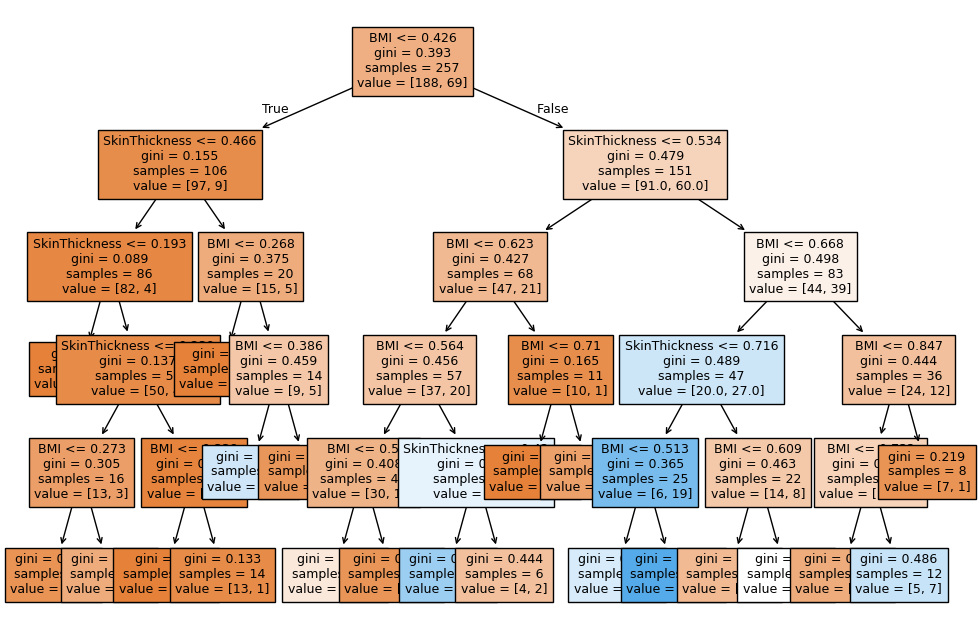

In [108]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))  # Adjust figure size if needed
plot_tree(dt_classifier,
          filled=True,
          fontsize=9,
          feature_names=X.columns)  # Use X.columns to get all feature names
plt.show()

In [109]:
# Get the number of leaf nodes
n_leaves = dt_classifier.get_n_leaves()
print(f"Number of leaf nodes: {n_leaves}")

# Get the depth of the tree
depth = dt_classifier.get_depth()
print(f"Depth of the tree: {depth}")

# Get the total number of nodes
n_nodes = dt_classifier.tree_.node_count
print(f"Total number of nodes: {n_nodes}")

Number of leaf nodes: 21
Depth of the tree: 5
Total number of nodes: 41


# 4.e Esemble

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [111]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Make predictions on the train set
y_pred_train = rf_classifier.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.9922178988326849
Test Accuracy: 0.6307692307692307


# 4.f Reduce overfitting


In [112]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42,
                                    n_estimators=100,
                                    max_depth=5,
                                    min_samples_split=5,
                                    min_samples_leaf=2,
                                    max_features="sqrt")
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Make predictions on the train set
y_pred_train = rf_classifier.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.8287937743190662
Test Accuracy: 0.6615384615384615


# 4fg Plot the first 5 trees

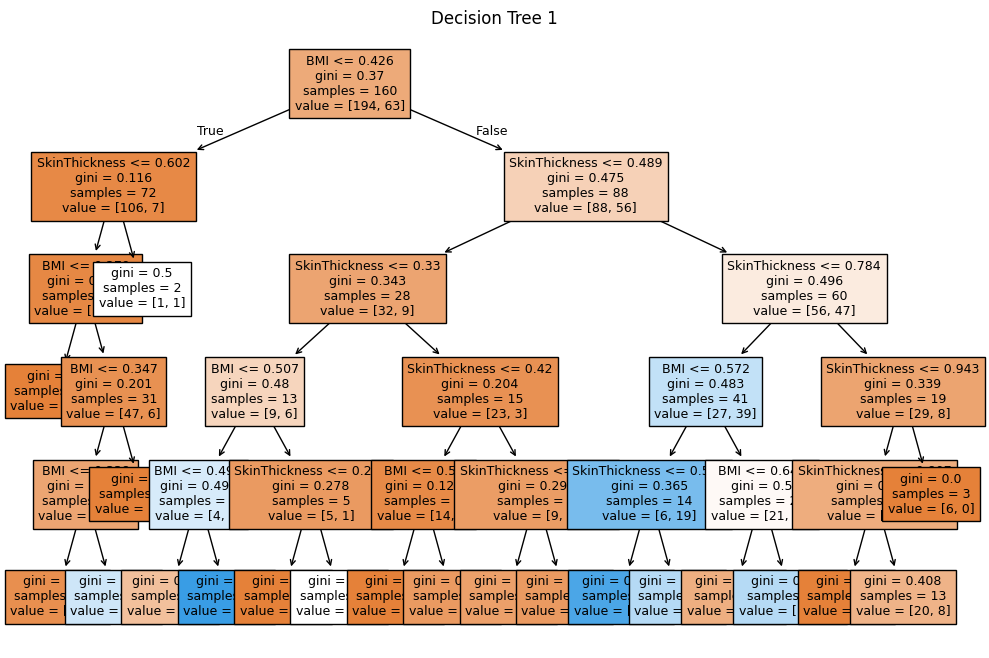

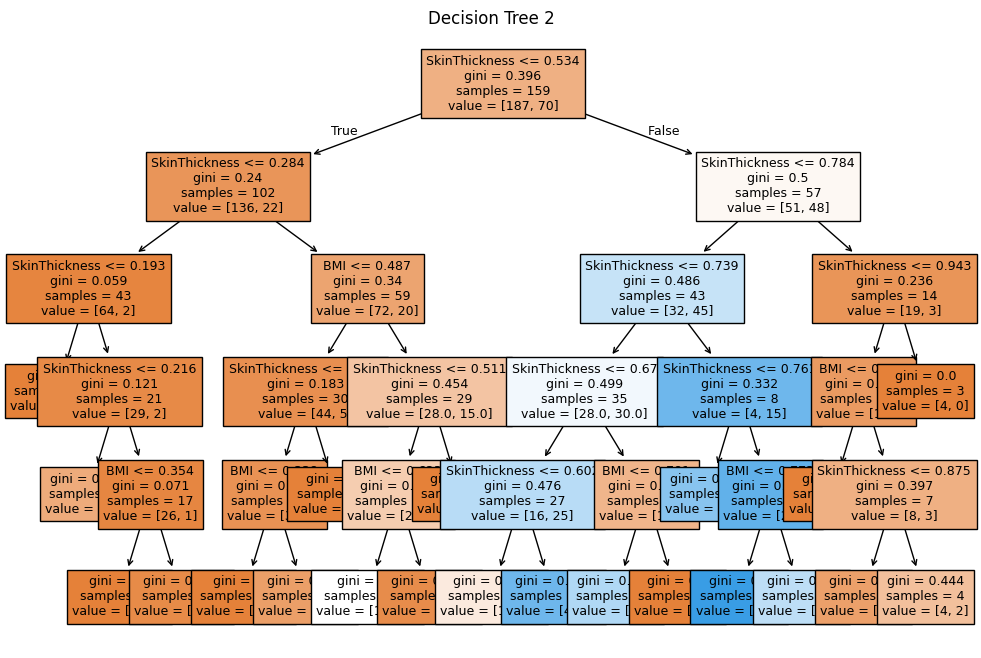

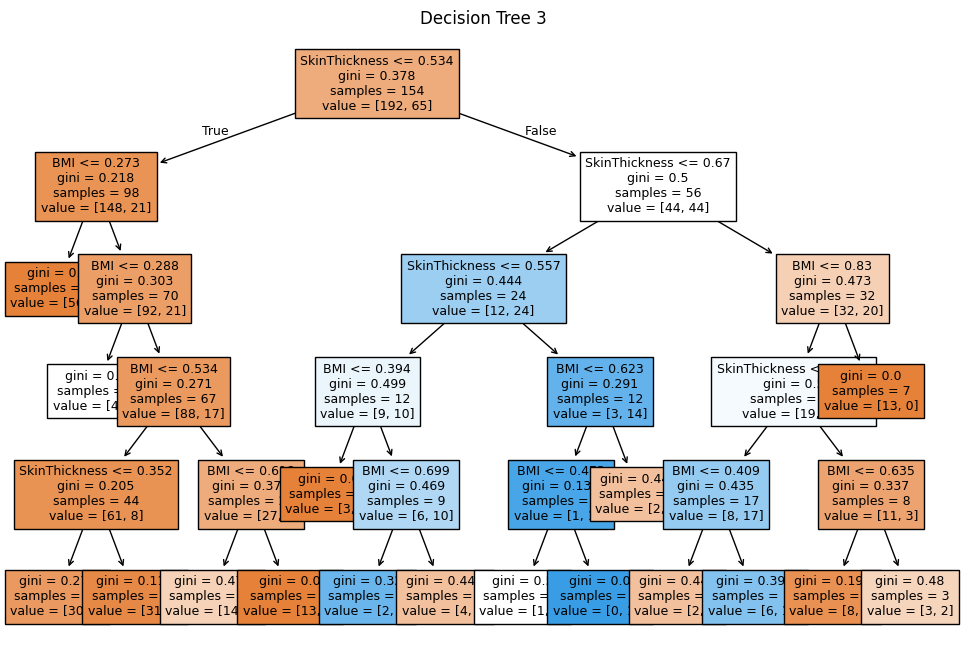

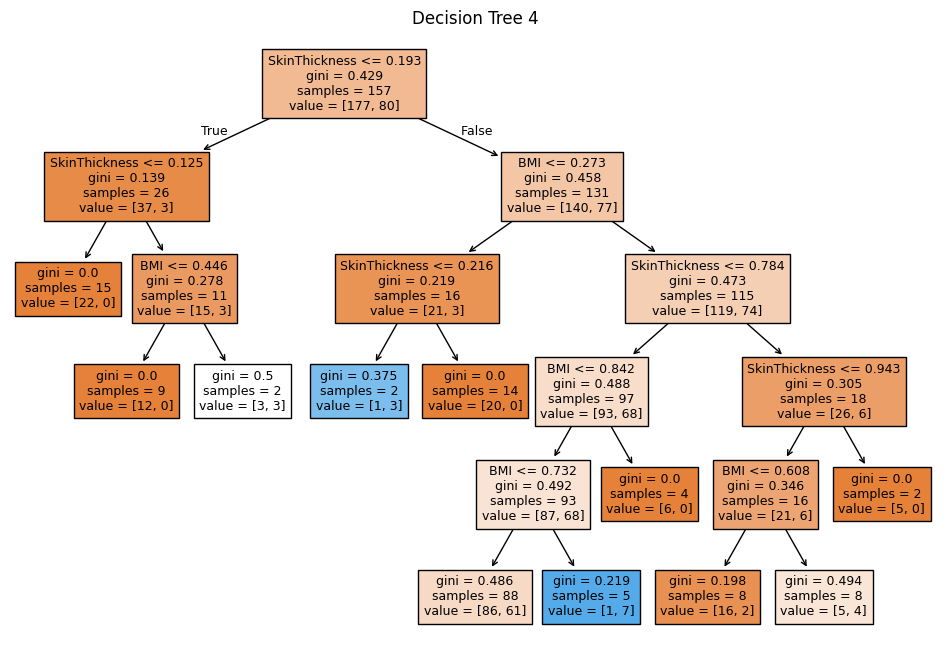

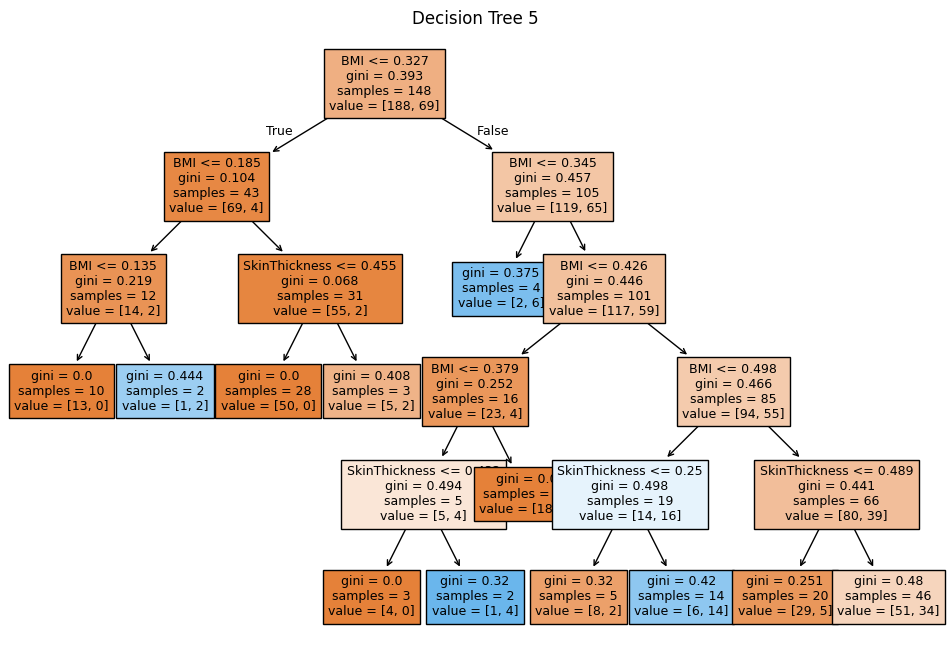

In [113]:
for i in range(5):
    plt.figure(figsize=(12, 8))
    plot_tree(rf_classifier.estimators_[i],
              filled=True,
              fontsize=9,
              feature_names=X.columns)
    plt.title(f"Decision Tree {i+1}")
    plt.show()

# 4.h Implement bagging

In [114]:
from sklearn.ensemble import BaggingClassifier  # or BaggingRegressor
from sklearn.tree import DecisionTreeClassifier  # or another base estimator

# Create a Bagging classifier
bagging_classifier = BaggingClassifier(
    estimator = DecisionTreeClassifier(),  # Use your desired base model
    n_estimators=100,  # Number of base estimators (models)
    max_samples=1.0,  # Proportion of samples to draw from the training set
    max_features=1.0,  # Proportion of features to draw from the training set
    random_state=42
)

# Train the classifier
bagging_classifier.fit(X_train, y_train)


# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Make predictions on the train set
y_pred_train = bagging_classifier.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.9922178988326849
Test Accuracy: 0.5846153846153846


# 4.i Implement Adaboost

In [115]:
from sklearn.ensemble import AdaBoostClassifier  # or AdaBoostRegressor

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Often use a weak learner
    n_estimators=50,  # Number of estimators
    learning_rate=1.0,  # Controls the contribution of each classifier
    random_state=42
)

# Train the classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Make predictions on the train set
y_pred_train = adaboost_classifier.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.7821011673151751
Test Accuracy: 0.6461538461538462


# 4.j Implement XGBoost

In [121]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,  # Number of estimators
    learning_rate=0.1,  # Step size shrinkage used in update to prevents overfitting
    max_depth=3,  # Maximum depth of a tree
    objective='binary:logistic',  # Specify the learning task and the corresponding learning objective
    random_state=42
)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Make predictions on the train set
y_pred_train = xgb_classifier.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.8715953307392996
Test Accuracy: 0.6615384615384615
